# tempo4D 
## Transmission electron microscope pattern observation - 4D

In [1]:
%matplotlib qt
from tempo4d import DataManager, DataProcessor, load, save_data, load_data, pad_images

## Load 4D-STEM data
**Supported file formats:**

- **Thermo Fisher Scientific**: `.emi`, `.xml` (EMPAD)  
- **GATAN**: `.dm3`, `.dm4`  
- **Dectris**: `.h5`
- **NanoMegas**: `.blo`
- **Direct Electron**: `.de5`  
- **Standard**: `.h5`, `.hdf5`

In [2]:
path = r"\pathtodata"
data, pixel_size = load(path, arina = False)
processor = DataProcessor(data, pixel_size=pixel_size, path_to_image="example.png")

Data shape : (128, 128, 256, 256)
Pixel size (nm) : 0.173


##### Pad diffraction patterns to 512x512 pixels for YOLO detection (optional)

In [3]:
padded = pad_images(data, target_shape=(512, 512))
processor = DataProcessor(padded, pixel_size=pixel_size, path_to_image="example.png")

## Generate Virtual STEM Image 
##### Currently uses the center of the diffraction patterns for virtual bright-field (BF) imaging

In [4]:
bf_image = processor.generate_bf_image(disk_size=20)

## Test NDPD
##### Test object detection on a single electron diffraction pattern

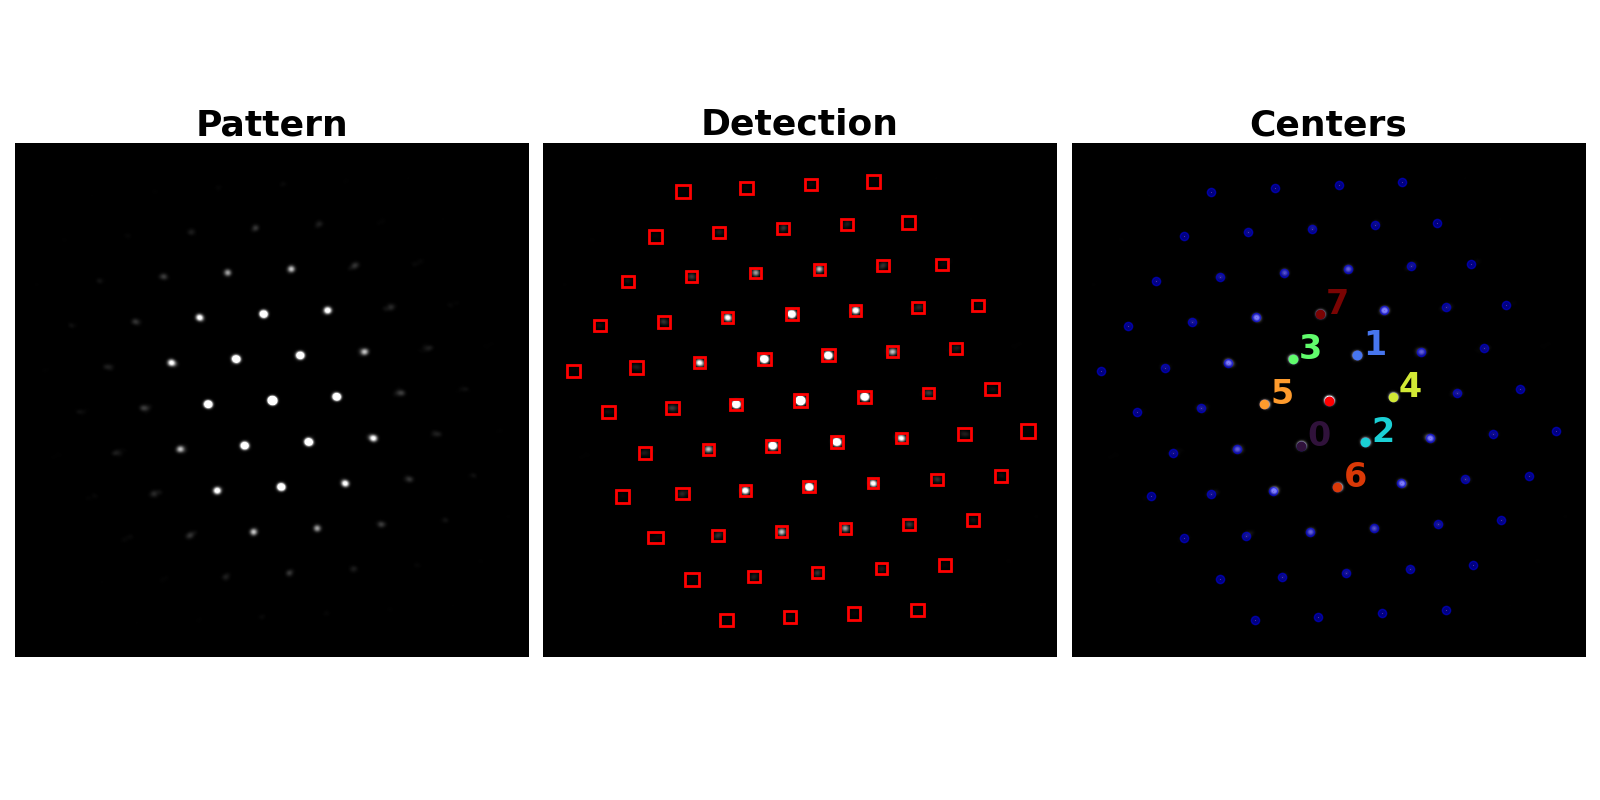

In [5]:
coords = processor.run_object_detection(
    i = 15, # row
    j = 12, # column
    normalize2 = 100,
    img_size = 512, 
    conf_score = 0.1,
    radius = 1, 
    neighbours = 8
)

## Process 4D-STEM
##### Realtime plotting of the displacement map for given h index

In [6]:
data_strain, angles = processor.launch_realtime_plot(
    image_size = 512, 
    h = 4, 
    normalize = 100, 
    neighbours = 8,
    conf = 0.1, 
    batch_size = 64
)

Total time to complete plot: 65.27 seconds


## Analyze 4D-STEM Data 
##### Please refer to Test NDPD step for indexing of the Bragg discs (h, k, hk and rotation indices)
##### Drag on displacement **h** map to select the reference ROI, then press **Enter** on your keyboard.
##### Drag on strain map **εₓₓ** to select the line profile ROI, then press **D** on your keyboard.
##### Integrate Along Columns (Row 0, Column-Wise)

In [1]:
processor.postprocess_strain(h = 4, 
                             k = 7, 
                             hk = 1, 
                             rotation = 4,
                             axis_parm = 1, save=True) 

NameError: name 'processor' is not defined

## Save Results
##### Save object detection results in .txt format (nearest neighbor distances and Bragg angles)

In [8]:
filename =  r"\pathtodata\.txt"
save_data(filename, data_strain, angles)

## Load Results
##### Load object detection results in .txt format (nearest neighbor distances and Bragg angles)

In [9]:
txt_path = r"\pathtodata\.txt"
strain_load, angles_load =load_data(txt_path)

Loaded distances shape: (128, 128, 8)
Loaded angles shape: (128, 128, 8)


## Analyze 4D-STEM Data 

In [10]:
processor = DataProcessor(
    pixel_size = pixel_size,
    path_to_image="LargeFOV_scan.jpg",
    nearest_distance_values = strain_load,
    angles = angles_load
)

processor.postprocess_strain(h = 0,
                             k = 2,
                             hk = 4,
                             rotation = 0,
                             axis_parm = 1)

ROI selected from (72, 99) to (91, 117)
new a0: 0.16729, b0: 0.16474, c0: 0.23720
